In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

In [2]:
data = load_diabetes()

In [4]:
data.DESCR

'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - age     age in years\n      - sex\n      - bmi     body mass index\n      - bp      average blood pressure\n      - s1      tc, total serum cholesterol\n      - s2      ldl, low-density lipoproteins\n      - s3      hdl, high-density lipoproteins\n      - s4      tch, total cholesterol / HDL\n      - s5      ltg, possibly log of serum triglycerides level\n      - s6      glu, blood sugar

In [5]:
dir(data)

['DESCR',
 'data',
 'data_filename',
 'data_module',
 'feature_names',
 'frame',
 'target',
 'target_filename']

In [6]:
X=data.data
y=data.target

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

In [9]:
from sklearn.linear_model import LinearRegression
l = LinearRegression()

In [10]:
l.fit(X_train, y_train)

LinearRegression()

In [11]:
l.coef_

array([  23.45465406, -247.42747406,  492.1087518 ,  329.35876431,
       -970.79723039,  573.54295519,  182.42162368,  255.92168168,
        794.21609282,   89.32249214])

In [12]:
l.intercept_

152.13623331746496

In [13]:
y_pred = l.predict(X_test)

In [14]:
from sklearn.metrics import r2_score, mean_squared_error
r2_score(y_test, y_pred)

0.5188113124539249

In [15]:
mean_squared_error(y_test, y_pred)

2374.3339396183187

In [16]:
#RMSE
np.sqrt(mean_squared_error(y_test, y_pred))

48.72713760953252

In [17]:
from sklearn.linear_model import Ridge
R = Ridge(alpha=100000)

In [18]:
R.fit(X_train, y_train)

Ridge(alpha=100000)

In [19]:
R.coef_

array([ 0.00260126,  0.00057066,  0.00776597,  0.0060976 ,  0.00233864,
        0.00184724, -0.00513942,  0.0052716 ,  0.00734598,  0.00528629])

In [20]:
R.intercept_

151.83287930791352

In [21]:
y_predR = R.predict(X_test)

In [22]:
r2_score(y_test, y_predR)

-0.00042490200441935855

In [23]:
np.sqrt(mean_squared_error(y_test, y_predR))

70.25956272917782

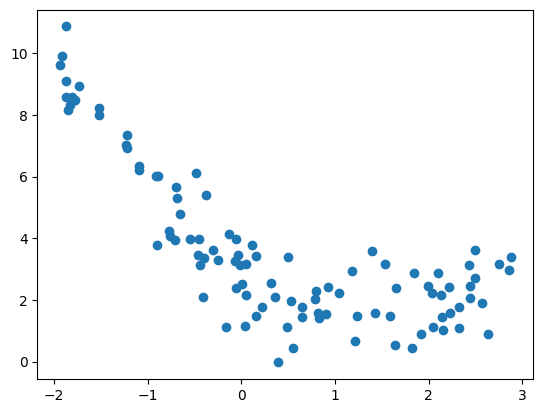

In [24]:
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2)
plt.show()

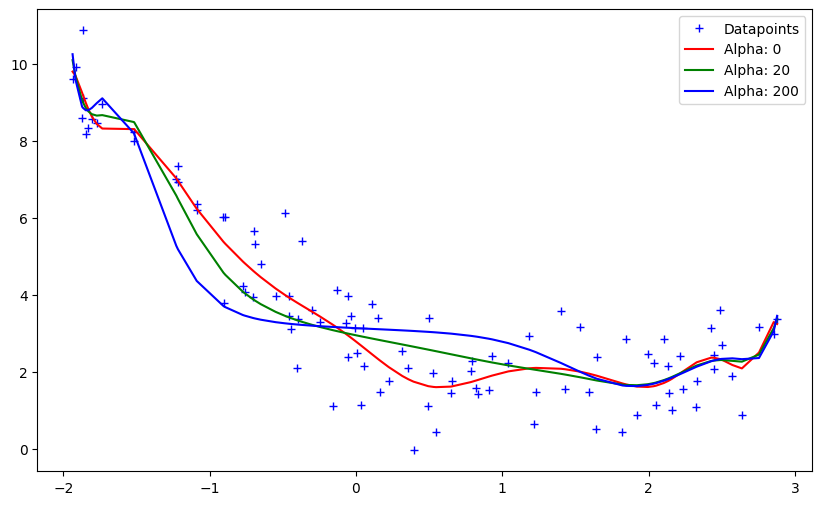

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 20, 200]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()
